In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import inflection as inf
import matplotlib.pyplot as plt
from scipy.stats import zscore
import datetime as dt
from datetime import timedelta
import string

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.1f}'.format


meat = pd.read_csv(r"C:\Users\ashish.c.patil\Downloads\meat2.csv",low_memory=False)
meat.drop(['Unnamed: 0'],axis=1,inplace=True)
#meat.head(100)

In [6]:
cal = pd.read_excel(r"C:\Users\ashish.c.patil\Downloads\AD_WK_CAL.xlsx",parse_dates=[4,5])
cal['Month'] = cal.VLD_FROM_DT.dt.strftime('%m')
#cal[(cal.AD_WK_NUM==1) & (cal.Month==12)]
#cal = cal[['AD_YR_NUM','AD_WK_NUM','Month']].drop_duplicates()
cal=cal[cal.AD_YR_NUM.isin([2018,2019,2020])].sort_values('AD_WK_NUM')
cal.rename(columns = {'AD_YR_NUM':'Ad_Year_Num','AD_WK_NUM':'Ad_Week_Num'},inplace = True)
cal = cal[['Ad_Year_Num','Ad_Week_Num','VLD_FROM_DT','VLD_TO_DT']].drop_duplicates()
cal

,Ad_Year_Num,Ad_Week_Num,VLD_FROM_DT,VLD_TO_DT
324,2020,1,2019-12-26,2020-01-01
603,2019,1,2018-12-27,2019-01-02
1062,2018,1,2017-12-28,2018-01-03
541,2020,2,2020-01-02,2020-01-08
574,2019,2,2019-01-03,2019-01-09
411,2018,2,2018-01-04,2018-01-10
1058,2020,3,2020-01-09,2020-01-15
1060,2018,3,2018-01-11,2018-01-17
1113,2019,3,2019-01-10,2019-01-16
174,2019,4,2019-01-17,2019-01-23


In [3]:
#meat.Ad_Week_Num = meat.Ad_Week_Num.where(meat.Ad_Week_Num.astype(str).str.len().ne(1),meat.Ad_Week_Num.astype(str).str.zfill(2))
#meat['Period']= meat['Ad_Year_Num'].astype(str)+meat['Ad_Week_Num'].astype(str)
#meat = meat.set_index('Period',drop=True).sort_index()
#meat.head(100)

In [4]:
#meat['Ad_Week_Num'] = meat['Ad_Week_Num'].astype(int)
#cut1 = meat.groupby(['Ad_Week_Num','MCH_1_Desc_En'])['SALES','SALESQTYUNITS','PROMO_SALES'].agg('sum').sort_values(by=['Ad_Week_Num','SALES'],ascending=[True,False])
#cut1 = cut1.unstack(level=1)

In [4]:
#cut1['SALES'].plot(figsize=(20,20),subplots=True)
#plt.show()

In [5]:
#cut1.loc[:,('PROMO_SALES',['Fresh Beef','Fresh-Poultry'])].plot(figsize=(30,15))
#plt.show()

In [6]:
#cut1['PROMO_SALES'].plot(figsize=(20,20),subplots=True)
#plt.show()

In [7]:
#comp = pd.read_csv(r"C:\Users\ashish.c.patil\Downloads\compinp.csv",encoding='unicode_escape',parse_dates=[6,7])
#comp.set_index('Item_valid_from',inplace=True,drop=True)
#comp.shape

In [1164]:
#comp = comp.drop_duplicates()
#comp['AD_WK_NUM'] = np.where(comp.Item_valid_from.dt.weekday>3,comp.Item_valid_from.dt.week-1,comp.Item_valid_from.dt.week)
#comp['AD_WK_END'] = comp['Item_valid_to'].apply(lambda x: (x + dt.timedelta(days=4)).week)
#comp['AD_Year'] = comp.Item_valid_from.dt.year
#comp['AD_Mth_Strt'] = comp.Item_valid_from.dt.strftime('%m')
#comp['AD_Day_Strt'] = comp.Item_valid_from.dt.strftime('%d')
comp = pd.read_csv(r"C:\Users\ashish.c.patil\Downloads\compinp.csv",encoding='unicode_escape',parse_dates=[6,7])
comp.drop_duplicates(inplace=True)
comp['AD_DAYS_RUN'] = (comp['Item_valid_to'] - comp['Item_valid_from']).apply(lambda x:x.days+1).astype('float')
comp['AD_WKS_RUN'] = round(comp['AD_DAYS_RUN']/7,0).astype(int)
compgt1 = comp[comp.AD_DAYS_RUN>7]
comp = comp[comp.AD_DAYS_RUN<=7]
df1 = pd.DataFrame(columns=compgt1.columns)
for index,row in compgt1.iterrows():
    df2 = pd.DataFrame(columns=compgt1.columns)
    
    for i in range(row.AD_WKS_RUN):
        df = pd.DataFrame(row)
        df=df.T
        df.Item_valid_from = df.Item_valid_from + pd.Timedelta(days=i*7)
        df2 = df2.append(df)
        
    df1 = df1.append(df2)
pd.concat([comp,df1],ignore_index=True)
comp['Ad_Year_Num'] = comp.Item_valid_from.dt.strftime('%Y')
comp['Ad_Week_Num'] = comp['Item_valid_from'].apply(lambda x: (x + pd.Timedelta(days=4)).week)
comp[['Ad_Year_Num','Ad_Week_Num']] = comp[['Ad_Year_Num','Ad_Week_Num']].astype(int)
comp = comp.merge(cal,how='left',on=['Ad_Year_Num','Ad_Week_Num'])
comp['Item_desc_cln'] = comp['Item_desc'].astype(str)
comp['Item_name_cln'] = comp['Item_name'].astype(str)
comp['Item_desc_cln'] = comp['Item_desc_cln'].str.replace('/lb',' per lb ')
comp['Item_name_cln'] = comp['Item_name_cln'].str.replace('/kg',' per kg ')
comp['Item_desc_cln'] = comp['Item_desc_cln'].str.replace('-',' ')
comp['Item_name_cln'] = comp['Item_name_cln'].str.replace('-',' ')
comp['Item_desc_cln'] = comp['Item_desc_cln'].str.lower().str.strip().str.replace('[^A-Za-z\s]+', '')
comp['Item_name_cln'] = comp['Item_name_cln'].str.lower().str.strip().str.replace('[^A-Za-z\s]+', '')
comp['Item_name_cln'] = comp['Item_name_cln'].str.replace('center','centre')
comp['Item_desc_cln'] = comp['Item_desc_cln'].str.replace('center','centre')
comp['Item_name_cln'] = comp['Item_name_cln'].str.replace('fresh','')
comp['Item_desc_cln'] = comp['Item_desc_cln'].str.replace('fresh','')
comp['Item_desc_cln'] = comp['Item_desc_cln'].apply(lambda x: ' '.join([inf.singularize(item) for item in x.split()]))
comp['Item_name_cln'] = comp['Item_name_cln'].apply(lambda x: ' '.join([inf.singularize(item) for item in x.split()]))
comp['Item_price_text_cln'] = comp['Item_price_text'].str.lower().str.replace('$','').str.strip()
comp['Prom_Type'] = np.where(comp.page_no==1,'FRONTPAGE','INSIDEPAGE')
comp.loc[((comp.Item_desc_cln =='g')|(comp.Item_desc_cln=='nan')),'Item_desc_cln']= ''
comp.shape

(36590, 23)

In [1165]:
bfr = comp.shape
comp['Item_dtl'] = (comp.Item_desc_cln.str.strip() +' '+ comp.Item_name_cln.str.strip())
comp['Item_dtl'] = comp['Item_dtl'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
comp['Item_dtl'] = comp['Item_dtl'].str.strip()
comp.drop_duplicates(subset=['Ad_Year_Num','Ad_Week_Num','Item_dtl','Region','Vendor','Prom_Type'],inplace=True)
comp = comp.sort_values(['Ad_Year_Num','Ad_Week_Num','Item_name_cln','Item_desc_cln','Region','Vendor','Prom_Type'])
comp.reset_index(drop=True,inplace=True)

comp['Item_current_price_cln'] = comp.Item_current_price.astype(str)
comp.Item_price_text_cln = comp.Item_price_text_cln.astype(str).str.replace('$','')
comp.Item_price_text_cln = comp.Item_price_text_cln.astype(str).str.replace('lb.','lb')
comp['Item_dtl2'] = (comp.Item_current_price_cln +' '+ comp.Item_desc_cln +' '+ comp.Item_name_cln +' '+ comp.Item_price_text_cln).str.strip().str.split()
comp['Item_dtl2'] = comp['Item_dtl2'].apply([lambda x: set(x)])
comp['Item_dtl2'] = comp['Item_dtl2'].apply([lambda x: sorted(x)])
comp['Item_dtl2'] = comp['Item_dtl2'].apply([lambda x: x.str.join(" ")])
comp['Item_dtl2'] = comp['Item_dtl2'].str.strip()
comp['Item_dtl2'] = comp['Item_dtl2'].apply(lambda x:''.join([i for i in x if i not in string.punctuation]))
comp['Item_dtl2'] = comp['Item_dtl2'].str.strip()
comp.drop_duplicates(subset=['Ad_Year_Num','Ad_Week_Num','Item_dtl2','Region','Vendor','Prom_Type'],inplace=True)
comp = comp.sort_values(['Ad_Year_Num','Ad_Week_Num','Item_name_cln','Item_desc_cln','Region','Vendor','Prom_Type'])
comp.reset_index(drop=True,inplace=True)
comp['pritem'] = (comp.Item_current_price_cln + ' ' + comp.Item_name_cln).str.strip()
comp['desclen'] = comp.Item_dtl2.apply(lambda x: len(x.split()))
comp = comp.sort_values(['Ad_Year_Num', 'Ad_Week_Num', 'Vendor','Region','Prom_Type','pritem','desclen'],ascending=[True,True,True,True,True,True,False]).reset_index(drop=True)
aft = comp.shape
print(bfr,aft)
#comp.head(10)

(36590, 23) (27307, 28)


In [1166]:
compwmt=comp[comp.Vendor=='Walmart'].reset_index(drop=True)
bfr = compwmt.shape
compwmt = compwmt.drop_duplicates(subset=['Ad_Year_Num','Ad_Week_Num','Item_sku','Region','Prom_Type'],keep='first').reset_index(drop=True)
compwmt = compwmt.drop_duplicates(subset=['Ad_Year_Num','Ad_Week_Num','Region','Prom_Type','pritem'],keep='first').reset_index(drop=True)
aft = compwmt.shape
print(bfr,aft)

(6758, 28) (3955, 28)


In [1167]:
compsob=comp[comp.Vendor=='Sobeys'].reset_index(drop=True)
bfr = compsob.shape
compsob = compsob.drop_duplicates(subset=['Ad_Year_Num','Ad_Week_Num','Region','Prom_Type','pritem'],keep='first').reset_index(drop=True)
aft = compsob.shape
print(bfr,aft)
compsob[(compsob.Region == 'Ontario') & (compsob.Prom_Type=='FRONTPAGE')].head(10)

(20549, 28) (16841, 28)


,ï..pre_price_text,Item_current_price,Item_desc,Item_name,Item_price_text,Item_sku,Item_valid_from,Item_valid_to,Region,Vendor,area,category,page_no,AD_DAYS_RUN,AD_WKS_RUN,Ad_Year_Num,Ad_Week_Num,VLD_FROM_DT,VLD_TO_DT,Item_desc_cln,Item_name_cln,Item_price_text_cln,Prom_Type,Item_dtl,Item_current_price_cln,Item_dtl2,pritem,desclen
228,NaN,2.0,bone-in,Pork Shoulder Blade Roast,/lb $4.39/kg,NaN,2018-04-05,2018-04-11,Ontario,Sobeys,3.06%,[Meat],1,7.0,1,2018,15,2018-04-05,2018-04-11,bone in,pork shoulder blade roast,/lb4.39/kg,FRONTPAGE,bone in pork shoulder blade roast,1.99,lb439kg 199 blade bone in pork roast shoulder,1.99 pork shoulder blade roast,8
229,NaN,2.0,product of Chile no 1,"Red or Black Plums, Yellow or White Flesh Peaches or Nectarines",/lb $4.39/kg,NaN,2018-04-05,2018-04-11,Ontario,Sobeys,2.82%,[Produce],1,7.0,1,2018,15,2018-04-05,2018-04-11,product of chile no,red or black plum yellow or white flesh peach or nectarine,/lb4.39/kg,FRONTPAGE,product of chile no red or black plum yellow or white flesh peach or nectarine,1.99,lb439kg 199 black chile flesh nectarine no of or peach plum product red white yellow,1.99 red or black plum yellow or white flesh peach or nectarine,15
230,NaN,3.0,product of USA\r\n3 pk,ANDY BOY Romaine Hearts,ea,NaN,2018-04-05,2018-04-11,Ontario,Sobeys,3.04%,[Produce],1,7.0,1,2018,15,2018-04-05,2018-04-11,product of usa pk,andy boy romaine heart,ea,FRONTPAGE,product of usa pk andy boy romaine heart,2.99,299 andy boy ea heart of pk product romaine usa,2.99 andy boy romaine heart,10
231,NaN,3.0,product of Israel\r\n2 lb bag,Orri Mandarins,ea.,NaN,2018-04-05,2018-04-11,Ontario,Sobeys,3.36%,[Produce],1,7.0,1,2018,15,2018-04-05,2018-04-11,product of israel lb bag,orri mandarin,ea.,FRONTPAGE,product of israel lb bag orri mandarin,2.99,299 bag ea israel lb mandarin of orri product,2.99 orri mandarin,9
232,reg,6.0,selected 450 g,SCHNEIDERS Red Hots Wieners,ea,NaN,2018-04-05,2018-04-07,Ontario,Sobeys,4.58%,[Meat],1,3.0,0,2018,15,2018-04-05,2018-04-11,selected g,schneider red hot wiener,ea,FRONTPAGE,selected g schneider red hot wiener,5.99,599 ea g hot red schneider selected wiener,5.99 schneider red hot wiener,8
233,NaN,7.0,cut from Canadian AAA grade beef or\r\nhigher,STERLING SILVER Striploin Steaks,/lb. $15.41/kg,NaN,2018-04-05,2018-04-11,Ontario,Sobeys,6.56%,[Meat],1,7.0,1,2018,15,2018-04-05,2018-04-11,cut from canadian aaa grade beef or higher,sterling silver striploin steak,/lb 15.41/kg,FRONTPAGE,cut from canadian aaa grade beef or higher sterling silver striploin steak,6.99,lb 1541kg 699 aaa beef canadian cut from grade higher or silver steak sterling striploin,6.99 sterling silver striploin steak,15
521,NaN,2.0,boneless fresh,Pork Loin Centre Chops,/lb 4.39/kg,NaN,2018-04-12,2018-04-18,Ontario,Sobeys,7.22%,[Meat],1,7.0,1,2018,16,2018-04-12,2018-04-18,boneless,pork loin centre chop,/lb4.39/kg,FRONTPAGE,boneless pork loin centre chop,1.99,lb439kg 199 boneless centre chop loin pork,1.99 pork loin centre chop,7
522,NaN,2.0,product of Ontario 4.39/kg or\r\nCOMPLIMENTS ORGANIC Whole White\r\nor Mini Bella Mushrooms product of\r\nOntario 227 g,"Red, Yellow or Orange Sweet Bell Peppers",/lb.ea,NaN,2018-04-12,2018-04-18,Ontario,Sobeys,4.44%,[Produce],1,7.0,1,2018,16,2018-04-12,2018-04-18,product of ontario kg or compliment organic whole white or mini bella mushroom product of ontario g,red yellow or orange sweet bell pepper,/lbea,FRONTPAGE,product of ontario kg or compliment organic whole white or mini bella mushroom product of ontario g red yellow or orange sweet bell pepper,1.99,lbea 199 bell bella compliment g kg mini mushroom of ontario or orange organic pepper product red sweet white whole yellow,1.99 red yellow or orange sweet bell pepper,21
523,NaN,3.0,air-chilled,SENSATIONS BY COMPLIMENTS Chicken Drumsticks or Thighs,/lb. $6.59/kg,NaN,2018-04-12,2018-04-18,Ontario,Sobeys,3.26%,[Meat],1,7.0,1,2018,16,2018-04-12,2018-04-18,air chilled,sensation by compliment chicken drumstick or thigh,/lb 6.59/kg,FRO

In [1168]:
compcln = pd.concat([compwmt,compsob],ignore_index=True)
compcln.to_csv('compcln.csv')
compcln.shape

(20796, 28)

In [1169]:
compcln['Name_desc']=compcln.Item_name_cln +' '+ compcln.Item_desc_cln
compcln['prom_count']= compcln.Name_desc.str.count(' or ')+1
compcln.loc[(compcln.category.isin(['[Meat]','[Meat, Air Miles]'])),'category'] = 'Meat'
compcln.loc[(compcln.category.isin(['[Produce]','[Produce, Air Miles]'])),'category'] = 'Produce'
compcln[(compcln.prom_count>2) & (compcln.Region=='Ontario')].sort_values(['Ad_Week_Num','Item_name_cln']).head(10)

,ï..pre_price_text,Item_current_price,Item_desc,Item_name,Item_price_text,Item_sku,Item_valid_from,Item_valid_to,Region,Vendor,area,category,page_no,AD_DAYS_RUN,AD_WKS_RUN,Ad_Year_Num,Ad_Week_Num,VLD_FROM_DT,VLD_TO_DT,Item_desc_cln,Item_name_cln,Item_price_text_cln,Prom_Type,Item_dtl,Item_current_price_cln,Item_dtl2,pritem,desclen,Name_desc,prom_count
10081,NaN,nan,Appetizers selected 250-800 g\r\n\r\nHors-d'uvre à la viande ou aux fruits de mer COMPLIMENTS ou SENSATIONS PAR COMPLIMENTS certaines variétés,COMPLIMENTS or SENSATIONS BY COMPLIMENTS Meat or Seafood,NaN,NaN,2019-12-26,2020-01-01,Ontario,Sobeys,20.39%,Meat,2,7.0,1,2019,1,2018-12-27,2019-01-02,appetizer selected g hor duvre la viande ou aux fruit de mer compliment ou sensation par compliment certaine varit,compliment or sensation by compliment meat or seafood,nan,INSIDEPAGE,appetizer selected g hor duvre la viande ou aux fruit de mer compliment ou sensation par compliment certaine varit compliment or sensation by comp...,nan,appetizer aux by certaine compliment de duvre fruit g hor la meat mer nan or ou par seafood selected sensation varit viande,nan compliment or sensation by compliment meat or seafood,22,compliment or sensation by compliment meat or seafood appetizer selected g hor duvre la viande ou aux fruit de mer compliment ou sensation par com...,3
10021,NaN,10.0,or Rib Tips mild breaded or salt and pepper 600-750 g\r\n\r\nAiles COMPLIMENTS ou bouts de côtes\r\nlevées douces panées ou sel et poivre,COMPLIMENTS Wings,NaN,NaN,2019-12-26,2020-01-01,Ontario,Sobeys,2.52%,Meat,1,7.0,1,2019,1,2018-12-27,2019-01-02,or rib tip mild breaded or salt and pepper g aile compliment ou bout de cte lefe douce pane ou sel et poivre,compliment wing,nan,FRONTPAGE,or rib tip mild breaded or salt and pepper g aile compliment ou bout de cte lefe douce pane ou sel et poivre compliment wing,9.99,999 aile and bout breaded compliment cte de douce et g lefe mild nan or ou pane pepper poivre rib salt sel tip wing,9.99 compliment wing,24,compliment wing or rib tip mild breaded or salt and pepper g aile compliment ou bout de cte lefe douce pane ou sel et poivre,3
10038,NaN,3.0,4 pk or DOLE Fruit Gels or Puddings,DEL MONTE Fruit Bowls,NaN,NaN,2019-12-26,2020-01-01,Ontario,Sobeys,3.39%,Produce,9,7.0,1,2019,1,2018-12-27,2019-01-02,pk or dole fruit gel or pudding,del monte fruit bowl,nan,INSIDEPAGE,pk or dole fruit gel or pudding del monte fruit bowl,2.99,299 bowl del dole fruit gel monte nan or pk pudding,2.99 del monte fruit bowl,11,del monte fruit bowl pk or dole fruit gel or pudding,3
10043,NaN,3.5,product of Peru or South\r\nAfrica no 1 grade\r\n\r\nTrès gros raisins rouges ou\r\nverts sans pépins ou Globe\r\nproduit du Pérou ou d'Afrique\r\...,Extra Large Red or Green Seedless or Globe Grapes,/lb $7.69/kg,NaN,2019-12-26,2020-01-01,Ontario,Sobeys,2.38%,Produce,4,7.0,1,2019,1,2018-12-27,2019-01-02,product of peru or south africa no grade tr gro raisin rouge ou vert san ppin ou globe produit du prou ou dafrique du sud catgorie no,extra large red or green seedless or globe grape,/lb7.69/kg,INSIDEPAGE,product of peru or south africa no grade tr gro raisin rouge ou vert san ppin ou globe produit du prou ou dafrique du sud catgorie no extra large ...,3.49,lb769kg 349 africa catgorie dafrique du extra globe grade grape green gro large no of or ou peru ppin product produit prou raisin red rouge san se...,3.49 extra large red or green seedless or globe grape,31,extra large red or green seedless or globe grape product of peru or south africa no grade tr gro raisin rouge ou vert san ppin ou globe produit du...,4
10084,NaN,nan,or Guacamole Dip assorted sizes,Prepared Fresh In-Store Mango or Pineapple Salsa,NaN,NaN,2019-12-26,2020-01-01,Ontario,Sobeys,2.56%,Produce,4,7.0,1,2019,1,2018-12-27,2019-01-02,or guacamole dip assorted size,prepared in store mango or pineapple salsa,nan,INSIDEPAGE,or guacamole dip assorted size prepared in store mango or pineapple salsa,nan,assorted dip guacamole in mango nan 

In [19]:
#comp[comp.AD_DAYS_RUN==1] 
meat['Prom_Type']= np.where(meat.Ad_Position_Cd.isin(['0','0.0','00','FP','FL','BP']),'FRONTPAGE',np.where(meat.Ad_Position_Cd.isin(['05','5','5.0','11','11.0','NO',np.NaN]),"NONE","INSIDEPAGE"))
meat['Flyr_flg']= np.where(meat.Prom_Type=='NONE',0,1)
meat.AH_4_Desc_En = meat.AH_4_Desc_En.fillna('None')
meat.AH_5_Desc = meat.AH_5_Desc.fillna('None')
#meat['Prom_Type']= np.where(meat.Marketing_Instr_Level2_Desc_En.isnull(),'NONE',meat.Marketing_Instr_Level2_Desc_En)
#meat.loc[meat.Prom_Type.isin(['FLAP','BACKPAGE']),'Prom_Type']='INSIDEPAGE'
#meat.head(100)

In [1162]:
meat[meat.Article_Desc.str.lower().str.contains('stir')].groupby(['Article_Desc','Ad_Year_Num'])['SALES','SALESQTYUNITS'].agg('sum')

SALES  SALESQTYUNITS
Article_Desc                  Ad_Year_Num                         
BEEF STIR FRY STRIP TEXAS     2018             88.6            5.6
                              2019          1,773.5          101.6
                              2020            660.5           39.8
BEEF STIR FRY STRIPS          2018        832,728.6       41,992.0
                              2019        741,726.6       39,224.7
                              2020        215,407.5       11,711.0
BEEF STIRFRY STRIPS           2018            324.9           32.6
                              2019            686.4           84.1
                              2020            136.8           13.2
CHICKEN STIR FRY BNLS SKLS PP 2018             11.3            0.4
                              2019            423.5           19.2
KOSHER BEEF SHLDR STIR FRY    2019             28.7            1.4
PC AC TURKEY STIR FRY STRIP   2018         53,769.0        2,457.7
                              2019          4,066.2          168.8
                              2020            378.4           16.2
PC FF TURKEY BREAST STIR FRY  2018            243.9            9.7
                              2019         50,321.7        2,301.6
                              2020         13,173.8          605.3
STIR FRY STRIPS               2018            159.2           10.7
                              2019              4.3            0.5

In [1163]:
meat.Prom_Type.value_counts(dropna=False)

18.393646998548373

In [21]:
meatpromo = meat[['Ad_Year_Num','Ad_Week_Num','MCH_1_Desc_En','AH_4_Desc_En','AH_5_Desc','Prom_Type']].drop_duplicates().reset_index(drop=True)
meatpromo['pcount']=1
meatpromo = meatpromo.sort_values(['Ad_Year_Num','Ad_Week_Num','AH_4_Desc_En','AH_5_Desc','Prom_Type'])
#meatpromo.head(1100)
#meatpromo.pivot_table(index=['Ad_Year_Num','Ad_Week_Num','Article_Id'],columns='Prom_Type',values='pcount',aggfunc='sum').reset_index().head(100)
#promomap = meatpromo.groupby(['Ad_Year_Num','Ad_Week_Num','MCH_1_Desc_En','AH_4_Desc_En','AH_5_Desc','Article_Id','Prom_Type'])['pcount'].agg(sum).reset_index()
#print(promomap.shape,meatpromo.shape)
meatpromo.head(10)

,Ad_Year_Num,Ad_Week_Num,MCH_1_Desc_En,AH_4_Desc_En,AH_5_Desc,Prom_Type,pcount
1558,2018,1,Processed,Bacon,Peameal,NONE,1
3509,2018,1,Processed,Bacon,Pork,FRONTPAGE,1
867,2018,1,Processed,Bacon,Pork,INSIDEPAGE,1
282,2018,1,Processed,Bacon,Pork,NONE,1
4455,2018,1,Processed,Bacon,Poultry,INSIDEPAGE,1
2312,2018,1,Processed,Bacon,Poultry,NONE,1
3149,2018,1,Frozen Boxed Meat,Beef,Mainstream,NONE,1
5125,2018,1,Fresh Service Case,Beef,PC Certified Angus Beef,NONE,1
5466,2018,1,Fresh Service Case,Beef,Premium Gold Angus (PGA),NONE,1
5019,2018,1,Frozen Boxed Meat,Beef,Value,NONE,1


In [1037]:
#test.loc[(test.AH_4_Desc_En == 'Grind')].drop_duplicates()

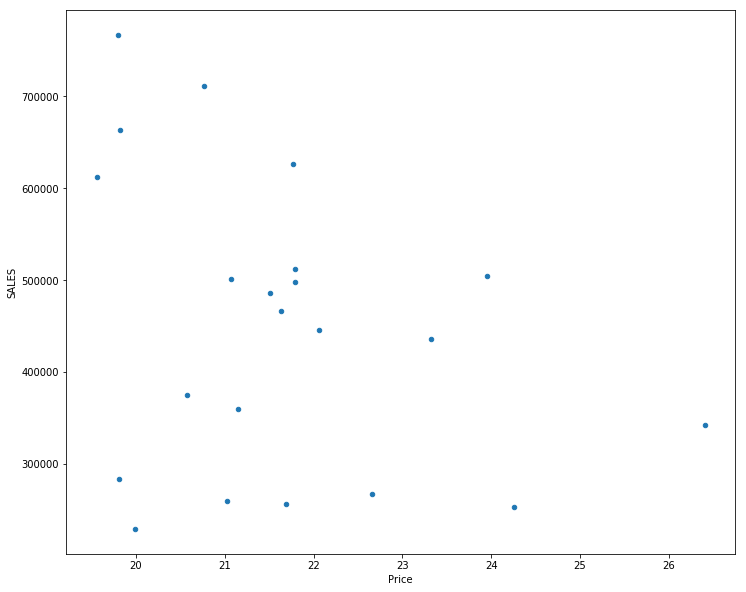

In [87]:
#test = meat.groupby(['MCH_1_Desc_En','AH_4_Desc_En','AH_5_Desc','Ad_Year_Num','Ad_Week_Num','Prom_Type'])['SALES','PROMO_SALES','SALESQTYUNITS'].agg('sum').reset_index()
#test['Price'] = test.SALES/test.SALESQTYUNITS
tenderloin = test.loc[(test.AH_4_Desc_En == 'Tenderloin') & (test.AH_5_Desc=='AAA') &(test.Prom_Type == 'FRONTPAGE'),['Ad_Year_Num','Ad_Week_Num','SALES','Price']]
tenderloin.plot(figsize=(12,10), kind='scatter',x='Price',y='SALES')
#tenderloin.sort_values(['Ad_Year_Num','Ad_Week_Num'])

In [25]:
#test.loc[('Fresh Beef','Tenderloin',slice(None),2019,['FRONTPAGE','INSIDEPAGE']),('PROMO_SALES','Price')]

In [252]:
## meatgrp = meat.groupby(['MCH_1_Desc_En','AH_4_Desc_En','AH_5_Desc','Ad_Year_Num','Ad_Week_Num','Promotion_Ind','Prom_Type'])['Prom_flag','SALES','PROMO_SALES','SALESQTYUNITS'].agg('sum').sort_values('SALES',ascending=False).reset_index()
#meatgrp.loc[([slice(None),slice('AAA'),slice(None),slice(None),slice(None),slice('N'),slice(None)]),:]
#meat.Prom_Type.value_counts()
meatgrp = meat.groupby(['MCH_1_Desc_En','AH_4_Desc_En','Ad_Year_Num','Ad_Week_Num','Prom_Type'])['Flyr_flg','SALES','PROMO_SALES','SALESQTYUNITS'].agg('sum').reset_index()
promomap = meatpromo.groupby(['MCH_1_Desc_En','AH_4_Desc_En','Ad_Year_Num','Ad_Week_Num','Prom_Type'])['pcount'].agg('sum').reset_index()
meatpromomap = meatgrp.merge(promomap,how='left',on=['Ad_Year_Num','Ad_Week_Num','MCH_1_Desc_En','AH_4_Desc_En','Prom_Type'])
meatpromomap2 = meatpromomap.groupby(['MCH_1_Desc_En','AH_4_Desc_En','Ad_Year_Num','Ad_Week_Num','Prom_Type'])['pcount','SALES','PROMO_SALES','SALESQTYUNITS'].agg('sum').reset_index()
meatpromomap3 = meatpromomap.groupby(['MCH_1_Desc_En','Ad_Year_Num','Ad_Week_Num','Prom_Type'])['pcount','SALES','PROMO_SALES','SALESQTYUNITS'].agg('sum').reset_index()


,MCH_1_Desc_En,AH_4_Desc_En,Ad_Year_Num,Ad_Week_Num,Prom_Type,pcount,SALES,PROMO_SALES,SALESQTYUNITS
9940,Processed,Wieners,2019,5,INSIDEPAGE,1,"10,512.0","10,512.0","2,150.0"
9941,Processed,Wieners,2019,5,NONE,4,"43,197.5","5,082.5","8,951.0"
9942,Processed,Wieners,2019,6,NONE,4,"52,506.1","5,624.0","10,674.0"
9943,Processed,Wieners,2019,7,INSIDEPAGE,2,"15,217.1","15,217.1","3,854.0"
9944,Processed,Wieners,2019,7,NONE,4,"38,276.8",272.0,"7,430.0"
9945,Processed,Wieners,2019,8,FRONTPAGE,1,"13,524.0","13,524.0","3,403.0"
9946,Processed,Wieners,2019,8,NONE,4,"41,304.7","1,761.9","8,599.0"
9947,Processed,Wieners,2019,9,NONE,4,"51,373.7","14,608.9","10,746.0"
9948,Processed,Wieners,2019,10,INSIDEPAGE,2,"26,051.5","26,051.5","6,027.0"
9949,Processed,Wieners,2019,10,NONE,4,"27,925.0",25.0,"5,591.0"


In [1284]:
itemlist = ['blade','brisket','rib','eye','flank','fondue','ground','inside','offal','outside','loin','top','sirloin','tip','stew','stewing','striploin','tenderloin']
itemset = set(itemlist)

itemlist2 = ['aaa','aa','angu','assorted','blade','beef','t','fast','cured','smoked','cap','off','simmering','bone','braising','brisket','burger','minute','corned','ginger','meatloaf','smoked','pastrami','kabob','slider','strip','sliced','shaved','grilling','sausage','meatball','roll','jerky','extra','lean','roast','steak','regular','medium','medallion','chuck','cross','round','prime','back','stir','fry','hip','short','rib','eye','flank','shank','marinating','porterhouse','diced','skirt','patties','fondue','ground','inside','offal','outside','loin','top','sirloin','tip','stew','stewing','striploin','tenderloin','wiener']
itemset2 = set(itemlist2)

compcln.Item_dtl = compcln.Item_dtl.str.replace('strip loin','striploin')
compbeef = compcln[(compcln.category=="Meat") & (compcln.Item_dtl.str.contains("beef")) &  ~(compcln.Item_dtl.str.contains("frozen"))].reset_index(drop=True)

items = pd.DataFrame([itemset & set(sorted(x.split())) for x in compbeef.Item_dtl])
items['items'] = items[items.columns].apply(lambda row: ','.join(row.values.astype(str)),axis=1)

items2 = pd.DataFrame([itemset2 & set(sorted(x.split())) for x in compbeef.Item_dtl])
items['items2'] = items2[items2.columns].apply(lambda row: ','.join(row.values.astype(str)),axis=1)

compbeef = pd.concat([compbeef,items['items'],items['items2']],axis=1)
compbeef['items3']= compbeef['items'].apply(lambda x: ','.join(sorted(x.replace(',None','').split(','))))
compbeef['items3']= compbeef['items3'].str.strip()

compbeef['items4']= compbeef['items2'].apply(lambda x: ','.join(sorted(x.replace(',None','').split(','))))
compbeef['items4']= compbeef['items4'].str.strip()

compbeef = compbeef.sort_values(['Ad_Year_Num','Ad_Week_Num','Region','Vendor','Prom_Type','items3','items4','desclen'],ascending=[True,True,True,True,True,True,True,False])
compbeef.drop_duplicates(subset=['Ad_Year_Num','Ad_Week_Num','Region','Vendor','Prom_Type','items4','Item_current_price_cln'],inplace=True)
compbeef['prom_new_count']=1

#acompbeef = compbeef[compbeef.Region=='Ontario'].groupby(['Ad_Year_Num','Ad_Week_Num','Month','Vendor','items3','items4','Prom_Type'])['prom_count','prom_new_count'].agg('sum').reset_index()

In [1285]:
compbeef.loc[(compbeef.items4.str.contains('stir') & compbeef.items4.str.contains('fry')),'items3'] = 'Stir Fry'
compbeef.loc[compbeef.items4.str.contains('strip[^\w]'),'items3'] = 'Stir Fry'
compbeef.loc[(compbeef.items4.str.contains('t') & compbeef.items4.str.contains('bone')),'items3'] = 'Short Loin'
#compbeef.loc[(compbeef.items4.str.contains('minute') & compbeef.items4.str.contains('steak')),'items3'] = 'Stir Fry'
#compbeef.loc[(compbeef.items4.str.contains('hip') & compbeef.items4.str.contains('steak')),'items3'] = 'Stir Fry'
compbeef.loc[(compbeef.items4.str.contains('stewing') | compbeef.items4.str.contains('stew')),'items3'] = 'Stew'
compbeef.loc[(compbeef.items4.str.contains('outside') & compbeef.Name_desc.str.contains('round')),'items3'] = 'Outside'
compbeef.loc[(compbeef.items4.str.contains('eye') & compbeef.Name_desc.str.contains('round')),'items3'] = 'Eye of Round'
compbeef.loc[(compbeef.items4.str.contains('rib')),'items3'] = 'Rib'
compbeef.loc[compbeef.Name_desc.str.contains('cap off'),'items3'] = 'Rib'
compbeef.loc[(compbeef.items4.str.contains('cross') & compbeef.Name_desc.str.contains('rib')),'items3'] = 'Cross Rib'
compbeef.loc[compbeef.items4.str.contains('sirloin,tip'),'items3'] = 'Sirloin Tip'
compbeef.loc[compbeef.items4.str.contains('blade,inside'),'items3'] = 'Blade'
compbeef.loc[compbeef.items4.str.contains('striploin'),'items3'] = 'Striploin'
compbeef.loc[compbeef.items4.str.contains('sirloin,top'),'items3'] = 'Top Sirloin'
compbeef.loc[compbeef.Name_desc.str.contains('marcangelo beef sirloin roast'),'items3'] = 'Top Sirloin'
compbeef.loc[compbeef.items4.str.contains('ground'),'items3'] = 'Grind'
compbeef.loc[compbeef.items3.str.contains('None'),'items3'] = 'Others'
compbeef.items3 = compbeef.items3.str.strip().str.title()
compbeef.shape

(1802, 35)

In [ ]:
compbeef.loc[(compbeef.items4.str.contains('sliced') & compbeef.items4.str.contains('shaved')),'items3'] = 'Deli Meat'
compbeef.loc[(compbeef.items4.str.contains('pastrami') & compbeef.items4.str.contains('smoked')),'items3'] = 'Deli Meat'
compbeef.loc[(compbeef.items4.str.contains('beef') & compbeef.items4.str.contains('ginger')),'items3'] = 'Dinner & Entres'
compbeef.loc[(compbeef.Name_desc.str.contains('kabob') |compbeef.Name_desc.str.contains('samosa')) ,'items3'] = 'Value Added'
compbeef.loc[compbeef.items4.str.contains('meatloaf'),'items3'] = 'Ready to Eat'
compbeef.loc[compbeef.Name_desc.str.contains('fully cooked'),'items3'] = 'Ready to Heat - Prepared Foods'
compbeef.loc[compbeef.Name_desc.str.contains('black river beef medallion'),'items3'] = 'Bbq Protein'
compbeef.loc[compbeef.Name_desc.str.contains('flame grilled'),'items3'] = 'Ready to Heat - Prepared Foods'
compbeef.loc[compbeef.items4.str.contains('meatball'),'items3'] = 'Easy Meals - Meatballs'
compbeef.loc[compbeef.Name_desc.str.contains('breakfast'),'items3'] = 'Easy Meals - Breakfast'
compbeef.loc[compbeef.Name_desc.str.contains('hot dog'),'items3'] = 'Handheld Snack'
compbeef.loc[compbeef.Name_desc.str.contains('pogo'),'items3'] = 'Handheld Snack'
compbeef.loc[compbeef.Name_desc.str.contains('bacon wrapped'),'items3'] = 'Bbq Protein'
compbeef.loc[compbeef.items4.str.contains('jerky'),'items3'] = 'Nuts/Seeds/Meat Snacks'
compbeef.loc[compbeef.Name_desc.str.contains('corned beef'),'items3'] = 'Canned Fish/Meat'
compbeef.loc[compbeef.Name_desc.str.contains('py'),'items3'] = 'Easy Meals - Pies & Dinners'
compbeef.loc[compbeef.items4.str.contains('wiener'),'items3'] = 'Wieners'
compbeef.loc[compbeef.items4.str.contains('sausage'),'items3'] = 'Sausage'

In [1272]:
#compbeef.iloc[658,:]
compbeef.loc[(compbeef.items3.str.contains('Others')),['Item_name','Item_desc','Name_desc','items3','items4','Item_current_price']].drop_duplicates()

,Item_name,Item_desc,Name_desc,items3,items4,Item_current_price
131,STERLING SILVER Fast Fry Minute Steak,hip cut\r\nboneless mechanically\r\ntenderized cut from\r\nCanada AAA beef\r\n15.41/kg,sterling silver fast fry minute steak hip cut boneless mechanically tenderized cut from canada aaa beef kg,Others,"aaa,beef,fast,fry,hip,minute,steak",7.0
126,Turkey or Beef Meatballs,800 g,turkey or beef meatball,Others,"beef,meatball",12.0
157,SENSATIONS Beef Burgers,selected varieties\r\n1.13 kg,sensation beef burger selected variety kg,Others,"beef,burger",10.0
156,COMPLIMENTS Beef Burgers,8 pk 907 g,compliment beef burger pk g,Others,"beef,burger",8.0
155,SENSATIONS Natural Jumbo All Beef Wieners,600 g,sensation natural jumbo all beef wiener,Others,"beef,wiener",7.5
160,JACK LINK'S Jerky,80 g or \r\nBeef or Chicken \r\nNuggets 100 g,jack link jerky g or beef or chicken nugget g,Others,"beef,jerky",5.0
187,NOSSACK Sausage Rolls,beef or pork 105 - 110 g,nossack sausage roll beef or pork g,Others,"beef,roll,sausage",1.0
222,ASPEN RIDGE Assorted Beef,cut from Canada AAA beef\r\nselect stores only,aspen ridge assorted beef cut from canada aaa beef select store only,Others,"aaa,assorted,beef",nan
219,STERLING SILVER Fast Fry Minute Steak,hip cut boneless mechanically tenderized cut from Canada AAA beef,sterling silver fast fry minute steak hip cut boneless mechanically tenderized cut from canada aaa beef,Others,"aaa,beef,fast,fry,hip,minute,steak",7.0
226,COMPLIMENTS Traditional Beef Burgers,907 g - 1.02 kg,compliment traditional beef burger g kg,Others,"beef,burger",8.0


In [1256]:
#compbeef.items4.loc[compbeef.items3.str.contains('Rib'),'items4'][2:].drop_duplicates()

x=list()
for i,r in compbeef[compbeef.items4.str.contains('rib')].iterrows():
    x.append(r.items4.split(',')[2:])

list(np.unique(np.array(x)))

[['beef', 'cap', 'off', 'prime', 'rib', 'roast'],
 ['beef', 'cap', 'off', 'prime', 'rib', 'steak'],
 ['beef', 'cross', 'rib', 'steak'],
 ['beef', 'grilling', 'rib', 'steak'],
 ['beef', 'prime', 'rib', 'roast'],
 ['bone', 'chuck', 'rib', 'short'],
 ['bone', 'grilling', 'rib', 'roast', 'steak', 't'],
 ['burger', 'rib'],
 ['cap', 'grilling', 'off', 'prime', 'rib', 'roast', 'steak'],
 ['cap', 'off', 'prime', 'rib', 'roast'],
 ['cap', 'off', 'prime', 'rib', 'roast', 'steak'],
 ['cap', 'off', 'prime', 'rib', 'steak'],
 ['cap', 'off', 'rib', 'roast', 'steak'],
 ['cap', 'prime', 'rib', 'roast'],
 ['cap', 'prime', 'rib', 'roast', 'steak'],
 ['cap', 'prime', 'rib', 'steak'],
 ['chuck', 'rib', 'short'],
 ['cross', 'rib'],
 ['cross', 'rib', 'roast'],
 ['cross', 'rib', 'roast', 'steak'],
 ['cross', 'rib', 'steak'],
 ['eye', 'grilling', 'prime', 'rib', 'steak'],
 ['eye', 'grilling', 'rib', 'steak'],
 ['eye', 'rib', 'roast', 'steak'],
 ['eye', 'rib', 'steak'],
 ['eye', 'rib', 'steak', 'top'],
 ['gril

In [1286]:
pd.set_option('max_colwidth', 150)
compbeef.loc[((compbeef.Ad_Year_Num==2020) & (compbeef.Ad_Week_Num==11) & (compbeef.Region=='Ontario') & (compbeef.Prom_Type=='INSIDEPAGE') & (compbeef.Vendor=='Sobeys')),['Item_current_price','Name_desc','desclen','items3','items4']].sort_values(['items4','Item_current_price'])

,Item_current_price,Name_desc,desclen,items3,items4
1862,14.0,sterling silver prime rib roast cap off cut from canada aaa grade beef,15,Rib,"aaa,beef,cap,off,prime,rib,roast"
1864,15.0,sterling silver prime rib steak cap offcut from canada aaa grade beef,14,Rib,"aaa,beef,cap,prime,rib,steak"
1868,6.0,sterling silver cross rib roast cut from canada aaa grade beef,13,Cross Rib,"aaa,beef,cross,rib,roast"
1872,7.0,sterling silver cross rib steak cut from canada aaa grade beef,13,Cross Rib,"aaa,beef,cross,rib,steak"
1869,6.0,sterling silver sirloin tip roast cut from canada aaa grade beef rti de pointe de surlonge sterling silver coupe de buf canada aaa,19,Sirloin Tip,"aaa,beef,roast,sirloin,tip"
1863,14.0,sterling silver striploin roast cut from canada aaa grade beef rti de contre filet sterling silver coupe de buf canada aaa,18,Striploin,"aaa,beef,roast,striploin"
1873,7.0,sterling silver sirloin tip steak cut from canada aaa grade beef bifteck de pointe de surlonge sterling silver coupe de buf canada aaa,19,"Sirloin,Tip","aaa,beef,sirloin,steak,tip"
1865,15.0,sterling silver striploin steak cut from canada aaa grade beef bifteck de contre filet sterling silver coupe de buf canada aaa,18,Striploin,"aaa,beef,steak,striploin"
1870,6.5,lean ground beef chuck slider burger de bloc dpaule de buf hach maigre,14,Grind,"beef,burger,chuck,ground,lean,slider"
1871,7.0,extra lean ground beef sirloin slider burger de surlonge de buf hach extra maigre,14,Grind,"beef,burger,extra,ground,lean,sirloin,slider"


In [485]:
s ='aa.433.33bbb.$!g=3@k34mnp6.79u5.78'
re.sub('(\d+\.\d+)','',s)
#re.sub('(\D+)','',s)

'43333334679578'

In [1135]:
#beefcat = meat.loc[(meat.MCH_1_Desc_En == 'Fresh Beef'),'AH_4_Desc_En'].drop_duplicates().reset_index(drop=True).tolist
g=pd.DataFrame()
g = compbeef.copy()
g[['others','lbs','kgs']] = g['Item_price_text_cln'].str.lower().str.strip().str.partition('lb')
#g[(g.items3.isin beefcat)]
g = g[g['items3'].isin(beefcat)]
#g.loc[g.others.str.strip().str.contains('ea.*\d|\d.*ea'),['Item_desc','Item_name','items3','Item_current_price','others']]
g.loc[g.Item_desc.str.contains('\d\s?[g]'),['Item_desc','Item_name','items3','Item_current_price','others','lbs','kgs']]

,Item_desc,Item_name,items3,Item_current_price,others,lbs,kgs
908,6.35/kg or COMPLIMENTS BALANCE\r\nLean Ground Pork 450 g,Lean Ground Beef,Grind,2.9,/,lb,ea
919,6.35/kg or COMPLIMENTS BALANCE\r\nLean Ground Pork 450 g,Lean Ground Beef,Grind,2.9,/,lb,ea
1044,cut from Canada AA grade or USDA select beef or SENSATIONS BY COMPLIMENTS Bison Steak 224 g,T-Bone Grilling Steak,Short Loin,8.0,/,lb,ea 17.61/kg
1053,cut from Canada AA grade\r\nor USDA select beef or SENSATIONS BY COMPLIMENTS Bison Steak 224 g\r\n\r\nBifteck d'aloyau à griller coupe de buf Can...,T-Bone Grilling Steak,Short Loin,8.0,/,lb,ea 17.61/kg
1100,or COMPLIMENTS Extra Lean Ground Chicken or Turkey 450 g,Extra Lean Ground Beef,Grind,4.0,/,lb,ea 8.82/kg
1107,ground in-store daily or COMPLIMENTS BALANCE Extra Lean\r\nGround Chicken or Turkey 450 g,Extra Lean Ground Beef,Grind,4.0,/,lb,ea 8.82/kg
1114,ground in-store daily or COMPLIMENTS BALANCE Extra Lean\r\nGround Chicken or Turkey 450 g,Extra Lean Ground Beef,Grind,4.0,/,lb,ea 8.82/kg
1208,bone-in cut from Canada AA grade beef or SENSATIONS BY COMPLIMENTS Bison Steaks 224 g,Striploin Grilling Steak,Short Loin,7.0,/,lb,ea 15.41/kg
1217,bone-in cut from Canada AA grade beef or SENSATIONS BY COMPLIMENTS Bison Steaks 224 g\r\n\r\nBifteck de contre-filet à griller avec os coupe de b...,Striploin Grilling Steak,Short Loin,7.0,/,lb,ea 15.41/kg
1489,or selected 454 g,Lean Ground Beef & Pork Blend Chub,Grind,6.0,nan,,


In [1136]:
#g[['Name_desc','Item_price_text','Item_current_price','lbs']][(g.Item_price_text.isnull())]
#p = g[(g.Item_price_text.notnull())]
g.loc[~g.Item_price_text_cln.str.contains('lb'),['Name_desc','Item_price_text_cln','Item_current_price','others','lbs']]
#g = compbeef.copy()
#g[['others','lbs','kgs']] = g['Item_price_text_cln'].str.lower().str.strip().str.partition('lb')
#g[['Name_desc','items3','Item_price_text','others','lbs','kgs']][g.Item_current_price.astype(float).isna()]

,Name_desc,Item_price_text_cln,Item_current_price,others,lbs
172,STERLING SILVER Inside Blade Pot Roast boneless cut from Canada AAA grade beef or higher,nan,nan,nan,
173,STERLING SILVER Inside Round Steak fast fry cut from Canada AAA grade beef or higher,nan,nan,nan,
170,ASPEN RIDGE Prime Rib Steak cap off cut from Canada AAA grade\r\nangus beef,nan,nan,nan,
171,ASPEN RIDGE Top Sirloin Grilling Medallions cut from Canada AAA grade angus beef,nan,nan,nan,
174,STERLING SILVER Stewing Beef boneless cut from Canada AAA\r\ngrade beef or higher,nan,nan,nan,
175,STERLING SILVER Striploin Steak cut from Canada AAA grade beef or higher,nan,nan,nan,
179,STERLING SILVER Inside Blade Pot Roast boneless cut from Canada AAA grade beef or higher,nan,nan,nan,
180,STERLING SILVER Inside Round Steak fast fry cut from Canada AAA grade beef or higher,nan,nan,nan,
177,ASPEN RIDGE Prime Rib Steak cap off cut from Canada AAA grade\r\nangus beef,nan,nan,nan,
178,ASPEN RIDGE Top Sirloin Grilling Medallions cut from Canada AAA grade angus beef,nan,nan,nan,


In [1137]:
comp.loc[comp.Item_desc.str.contains('Medallions'),['Item_name','Item_desc']]

,Item_name,Item_desc
2510,Bacon Wrapped Scallop,Medallions frozen
2685,Bacon Wrapped Scallop,Medallions frozen
2717,STERLING SILVER Top Sirloin,Grilling Medallions cut from\r\nCanada AAA beef
11096,SENSATIONS BY COMPLIMENTS Fresh Bison Steaks,Elk Medallions or Elk\r\nSteaks 224 g
11169,SENSATIONS BY COMPLIMENTS Fresh Bison Steaks,"Elk Medallions or Elk Steaks 224 g\r\n\r\nBiftecks de bison frais SENSATIONS PAR COMPLIMENTS, médaillons\r\nou biftecks d'élan"
11170,SENSATIONS BY COMPLIMENTS Fresh Bison Steaks,Elk Medallions or Elk Steaks 224 g
11276,SENSATIONS BY COMPLIMENTS Fresh Bison Steaks,Elk Medallions or Elk Steaks 224 g
11781,SENSATIONS BY COMPLIMENTS Bison Steaks,or Elk\r\nMedallions or Steaks\r\nfresh 224 g
11850,SENSATIONS BY COMPLIMENTS Bison Steaks,or Elk Medallions\r\nor Steaks fresh 224 g\r\n\r\nBiftecks de bison\r\nSENSATIONS PAR\r\nCOMPLIMENTS ou\r\nmédaillons ou biftecks\r\nd'orignal
11851,SENSATIONS BY COMPLIMENTS Bison Steaks,or Elk\r\nMedallions or Steaks\r\nfresh 224 g


In [1141]:
beefcat = meat.loc[(meat.MCH_1_Desc_En == 'Fresh Beef'),'AH_4_Desc_En'].drop_duplicates().reset_index(drop=True)
beefcat = beefcat.tolist()
compbeef.items3.drop_duplicates()

131                   Stir Fry
126     Easy Meals - Meatballs
129                      Grind
130                Sirloin Tip
128                Top Sirloin
133                        rib
134                     inside
135                       Stew
144                  Striploin
158                 Short Loin
157                     Others
155                    Wieners
152                        Rib
160     Nuts/Seeds/Meat Snacks
172                      Blade
169                 Tenderloin
187                    Sausage
191                      blade
206                    outside
248                  Deli Meat
290                Value Added
541            Dinner & Entres
564               Ready to Eat
701                    sirloin
748                    brisket
993                    Burgers
30                       flank
1318    Easy Meals - Breakfast
Name: items3, dtype: object

In [940]:
compbeef[['others','lbs','kgs']] = compbeef['Item_price_text'].str.lower().str.strip().str.partition('lb')

compbeef.loc[compbeef.others.str.strip().str.contains('ea.*\d|\d.*ea'),['Name_desc','Item_current_price','others']]

,Name_desc,Item_current_price,others
258,beef stir fry strip cut from canada aa beef or higher,6.0,ea. 13.23/kg
285,beef stir fry strip cut from canada aa beef or higher,6.0,ea. 13.23/kg
1368,kitchen prepared meatloaf turkey or beef g compliment mashed potato g air mile,5.59,ea 12.99 ea
1754,schneider oktoberfest sausage mini sizzler sausage round chicken py or beef py g,30.0,or 3.99 each
1758,schneider oktoberfest sausage mini sizzler sausage round chicken py or beef py g,30.0,or 3.99 ea
1762,schneider oktoberfest sausage mini sizzler sausage round chicken py or beef py g sauciss oktober...,30.0,or 3.99 each
1765,schneider oktoberfest sausage mini sizzler sausage round chicken py or beef py g,30.0,or 3.99 ea
1771,schneider oktoberfest sausage mini sizzler sausage round chicken py or beef py g,30.0,or 3.99 ea


In [885]:
import re
#compbeef.Item_price_text = compbeef.Item_price_text.str.lower().str.replace('/lb','lb ')
#compbeef['lbs'],compbeef['othrs']= compbeef.Item_price_text.str.split('',n=1,expand=True)
#pd.DataFrame([re.split('[^lb$]',x) for x in compbeef['Item_price_text']])[0].value_counts().sum()

#x=pd.DataFrame()
compbeef[['others','lbs','kgs']] = compbeef['Item_price_text'].str.strip().str.lower().str.replace('/b','/lb').str.replace('/lb','lb ').str.partition('lb')
compbeef['kgs_new'] = compbeef['kgs'].str.strip().str.replace(',','.').str.replace('[^\d*\.?\d*]','').str.replace('(^\.)|(\.$)','').str.replace('17.6117.61','17.61')
#x[x.kgs_new==''].drop_duplicates()
#compbeef.kgs_new.value_counts(dropna=False)
#x[['kgs','kgs_new']].drop_duplicates()
compbeef.loc[((compbeef.lbs=='lb')|(compbeef.others.str.contains('ea'))),'lbs']= compbeef.Item_current_price
compbeef.loc[compbeef.others.str.contains('(\s\w$)'),'others']=compbeef.loc[compbeef.others.str.contains('(\s\w$)'),'others'].str.replace('[^\d+]','')
compbeef.loc[compbeef.others.str.contains('(\d\w$)'),'others']=compbeef.loc[compbeef.others.str.contains('(\d\w$)'),'others'].str.replace('[^\d+]','')
#onlyg.others.str.replace('[^\d+]','')
#compbeef.others.drop_duplicates()
#compbeef.loc[compbeef.others.str.contains('(\w\d)'),'others']
#compbeef[['Item_price_text','Item_current_price','others','lbs','kgs_new']].drop_duplicates()
##compbeef.loc[compbeef.others.str.contains('\.\d+\s'),'lbs'] = compbeef.loc[compbeef.others.str.contains('\.\d+\s'),'others'].str.replace('[^\d+.?]','')
##compbeef.loc[compbeef.others.str.contains('\.\d+\s'),'others'] = compbeef.loc[compbeef.others.str.contains('\.\d+\s'),'others'].str.replace('[^\d+.?]','')
##compbeef.loc[compbeef.others.str.strip().str.contains('/kg'),'others']= compbeef.loc[compbeef.others.str.strip().str.contains('/kg'),'others'].str.replace('[^\d+\.]','').str.replace('\A.','')
##compbeef.loc[(compbeef.others.str.contains('nan')),'lbs']= compbeef.Item_current_price
##compbeef.loc[(compbeef.others.str.contains('\d+')),'others']
#compbeef.loc[(compbeef.others.str.contains('\d+')),'lbs']= ((1000)/(compbeef.others.str.strip().astype(float)))*(compbeef.Item_current_price.str.strip().astype(float))
#compbeef[['Item_price_text','Item_current_price','others','lbs','kgs_new']][compbeef.lbs==''].drop_duplicates()
compbeef.others.drop_duplicates()
compbeef.others[compbeef.others.str.contains('.+kg')]
#compbeef.loc[compbeef.others.str.strip().str.contains('/kg'),'others']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


258    ea. 13.23/kg
285    ea. 13.23/kg
Name: others, dtype: object

In [548]:
promocomp = acompbeef.groupby(['Ad_Year_Num','Ad_Week_Num','Month','Vendor','Prom_Type'])['prom_count','prom_new_count'].agg('sum').reset_index()
promocomp

,Ad_Year_Num,Ad_Week_Num,Month,Vendor,Prom_Type,prom_count,prom_new_count
0,2018,15,04,Sobeys,FRONTPAGE,2,1
1,2018,15,04,Sobeys,INSIDEPAGE,2,1
2,2018,16,04,Sobeys,INSIDEPAGE,12,7
3,2018,17,04,Sobeys,FRONTPAGE,1,1
4,2018,17,04,Sobeys,INSIDEPAGE,9,6
5,2018,18,04,Sobeys,INSIDEPAGE,8,4
6,2018,19,05,Sobeys,INSIDEPAGE,8,7
7,2018,20,05,Sobeys,INSIDEPAGE,10,6
8,2018,21,05,Sobeys,FRONTPAGE,4,2
9,2018,21,05,Sobeys,INSIDEPAGE,6,3


In [510]:
#pd.concat([meatpromomap,compcln],keys=['Ad_Year_Num','Ad_Week_Num','Prom_Type'],sort=False).tail(100)

acombeef2 = meatpromomap3[meatpromomap3.MCH_1_Desc_En=="Fresh Beef"].merge(promocomp,how='left',on=['Ad_Year_Num','Ad_Week_Num','Prom_Type'])
acombeef2 = acombeef2.merge(cal,how='left',on=['Ad_Year_Num','Ad_Week_Num'])
#acombeef2.to_csv('acombeef6.csv')

In [511]:
acombeef2.head(100)

,MCH_1_Desc_En,Ad_Year_Num,Ad_Week_Num,Prom_Type,pcount,SALES,PROMO_SALES,SALESQTYUNITS,Month,Vendor,prom_count,prom_new_count,VLD_FROM_DT,VLD_TO_DT
0,Fresh Beef,2018,1,FRONTPAGE,2,"396,114.8","396,114.8","46,176.0",NaN,NaN,nan,nan,2017-12-28,2018-01-03
1,Fresh Beef,2018,1,INSIDEPAGE,2,"22,062.8","22,062.8","1,400.3",NaN,NaN,nan,nan,2017-12-28,2018-01-03
2,Fresh Beef,2018,1,NONE,43,"969,845.2","354,153.2","59,118.9",NaN,NaN,nan,nan,2017-12-28,2018-01-03
3,Fresh Beef,2018,2,FRONTPAGE,2,"278,253.4","278,253.4","33,627.0",NaN,NaN,nan,nan,2018-01-04,2018-01-10
4,Fresh Beef,2018,2,INSIDEPAGE,2,"91,671.1","91,671.1","6,493.2",NaN,NaN,nan,nan,2018-01-04,2018-01-10
5,Fresh Beef,2018,2,NONE,45,"826,767.3","222,147.6","48,978.4",NaN,NaN,nan,nan,2018-01-04,2018-01-10
6,Fresh Beef,2018,3,FRONTPAGE,3,"423,847.2","423,847.2","46,007.4",NaN,NaN,nan,nan,2018-01-11,2018-01-17
7,Fresh Beef,2018,3,INSIDEPAGE,2,"32,634.7","32,634.7","1,029.0",NaN,NaN,nan,nan,2018-01-11,2018-01-17
8,Fresh Beef,2018,3,NONE,43,"780,931.4","303,122.7","50,716.4",NaN,NaN,nan,nan,2018-01-11,2018-01-17
9,Fresh Beef,2018,4,FRONTPAGE,1,"302,376.1","302,376.1","17,808.0",NaN,NaN,nan,nan,2018-01-18,2018-01-24


In [512]:
#acombeef2 = acombeef2.merge(cal,on=['Ad_Year_Num','Ad_Week_Num'],how='left')

#compts = acombeef.groupby(['Ad_Year_Num','Ad_Week_Num'])['SALES','PROMO_SALES','SALESQTYUNITS'].agg('sum').reset_index()
acombeef2.set_index(pd.DatetimeIndex(acombeef2.VLD_TO_DT))

,MCH_1_Desc_En,Ad_Year_Num,Ad_Week_Num,Prom_Type,pcount,SALES,PROMO_SALES,SALESQTYUNITS,Month,Vendor,prom_count,prom_new_count,VLD_FROM_DT,VLD_TO_DT
VLD_TO_DT,,,,,,,,,,,,,,
2018-01-03,Fresh Beef,2018,1,FRONTPAGE,2,"396,114.8","396,114.8","46,176.0",NaN,NaN,nan,nan,2017-12-28,2018-01-03
2018-01-03,Fresh Beef,2018,1,INSIDEPAGE,2,"22,062.8","22,062.8","1,400.3",NaN,NaN,nan,nan,2017-12-28,2018-01-03
2018-01-03,Fresh Beef,2018,1,NONE,43,"969,845.2","354,153.2","59,118.9",NaN,NaN,nan,nan,2017-12-28,2018-01-03
2018-01-10,Fresh Beef,2018,2,FRONTPAGE,2,"278,253.4","278,253.4","33,627.0",NaN,NaN,nan,nan,2018-01-04,2018-01-10
2018-01-10,Fresh Beef,2018,2,INSIDEPAGE,2,"91,671.1","91,671.1","6,493.2",NaN,NaN,nan,nan,2018-01-04,2018-01-10
2018-01-10,Fresh Beef,2018,2,NONE,45,"826,767.3","222,147.6","48,978.4",NaN,NaN,nan,nan,2018-01-04,2018-01-10
2018-01-17,Fresh Beef,2018,3,FRONTPAGE,3,"423,847.2","423,847.2","46,007.4",NaN,NaN,nan,nan,2018-01-11,2018-01-17
2018-01-17,Fresh Beef,2018,3,INSIDEPAGE,2,"32,634.7","32,634.7","1,029.0",NaN,NaN,nan,nan,2018-01-11,2018-01-17
2018-01-17,Fresh Beef,2018,3,NONE,43,"780,931.4","303,122.7","50,716.4",NaN,NaN,nan,nan,2018-01-11,2018-01-17


In [ ]:
#meat.groupby(['MCH_1_Desc_En','AH_4_Desc_En','Ad_Year_Num','Ad_Week_Num','Promotion_Ind','Prom_Type'])['SALES'].agg('sum').reset_index()['SALES'].agg('sum')
#print(meatgrp[meatgrp.Promotion_Ind=='N'].shape,meatgrp[meatgrp.Promotion_Ind=='Y'].shape)

#meat.drop(['Prom_flag'],axis=1)
#meat.loc[((meat.MCH_1_Desc_En == 'Fresh Beef') & (meat.AH_5_Desc == 'AAA') & (meat.Ad_Year_Num == 2019)),:].groupby(meat.Ad_Week_Num.astype(int))['PROMO_SALES','SALES'].agg('sum').plot(figsize=(20,20),kind='density')

In [ ]:
#meatgrp.groupby('Promotion_Ind')['Prom_flag'].agg('sum')

meatpromomap.to_csv('meatpromo.csv')

In [114]:
compcln.Prom_Type.describe()

count          20820
unique             2
top       INSIDEPAGE
freq           17847
Name: Prom_Type, dtype: object

In [115]:
meatpromomap.Prom_Type.describe()

count     2130
unique       3
top       NONE
freq       933
Name: Prom_Type, dtype: object

In [171]:
comb.to_csv('comb.csv')